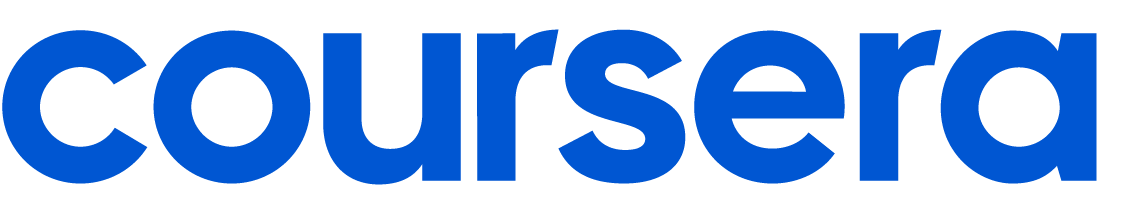

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import any other packages you may want to use
import math
!pip install xgboost

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [4]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

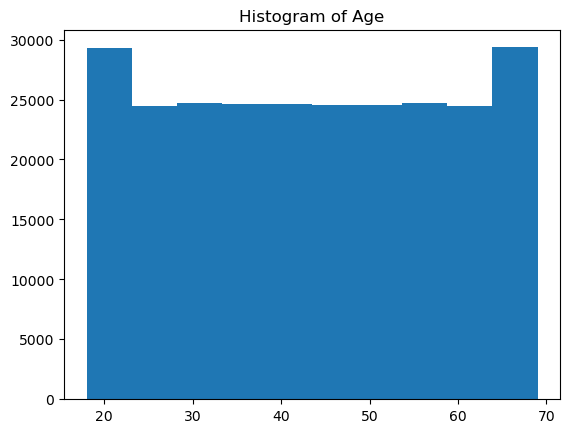

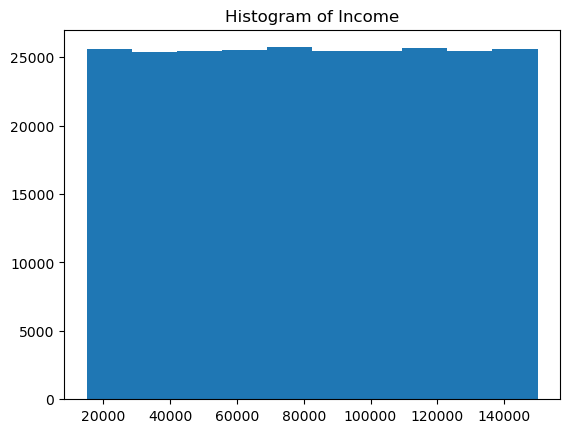

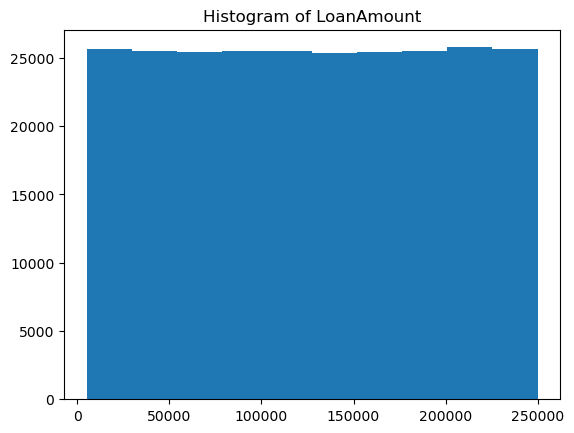

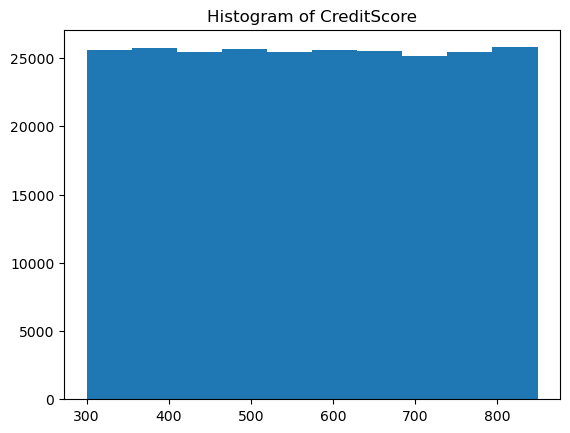

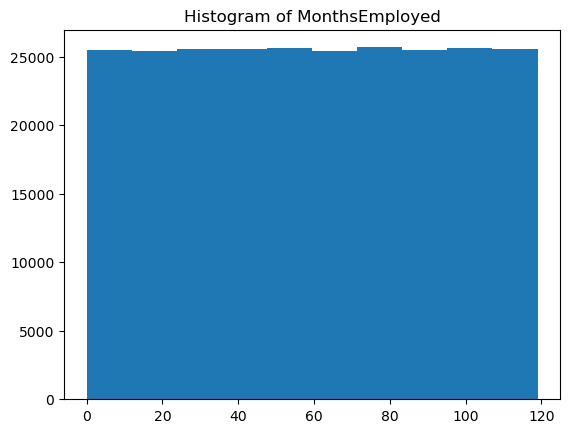

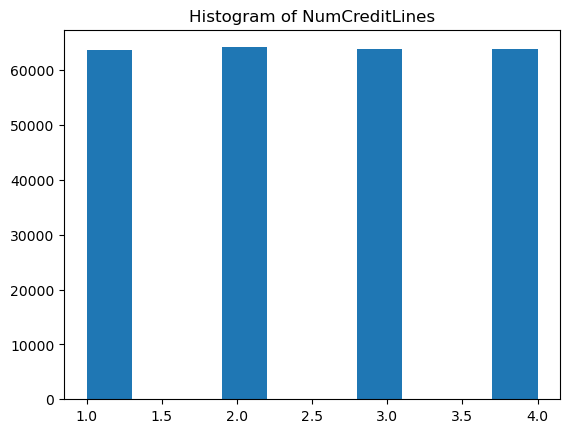

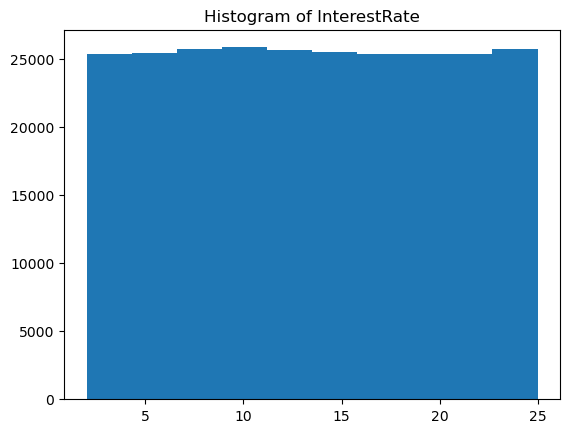

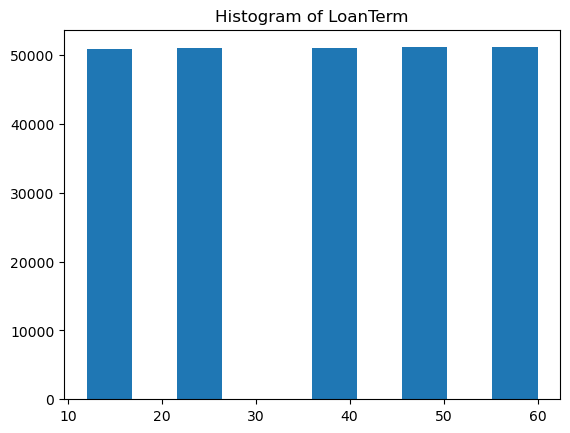

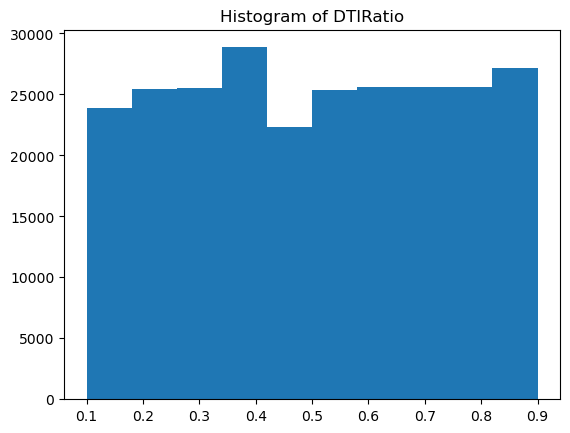

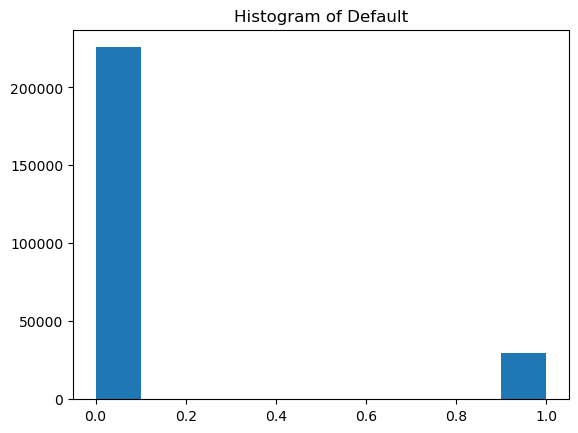

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
0,32,131645,43797,802,23,2,6.10,24,0.13
1,61,134312,18402,369,87,2,12.99,60,0.59
2,55,115809,151774,563,3,3,5.51,48,0.82
3,58,94970,55789,337,24,1,23.93,36,0.77
4,63,71727,189798,451,52,3,22.05,48,0.44
...,...,...,...,...,...,...,...,...,...
109430,67,76970,108110,404,67,3,10.51,36,0.18
109431,44,108272,238508,335,28,1,9.65,24,0.32
109432,54,73526,18513,576,75,2,17.22,36,0.62
109433,60,75296,38414,369,71,4,17.69,36,0.66


In [6]:
# your code here (optional)
# Splite data into categorical and numerical variables
train_numerical = train_df.select_dtypes('number')
train_categorical = train_df.drop(train_df.select_dtypes('number').columns, axis = 1)
train_categorical['Default'] = train_df['Default'] # add Default to Categorical variables
train_categorical = train_categorical.drop('LoanID',axis = 1)

test_numerical = test_df.select_dtypes('number')
test_categorical = test_df.drop(test_df.select_dtypes('number').columns, axis = 1)
test_categorical = test_categorical.drop('LoanID',axis = 1)

for column in train_numerical.columns:
    plt.hist(train_numerical[column])
    plt.title(f'Histogram of {column}')
    plt.show()
    
test_numerical

In [7]:
train_numerical.isnull().sum()
# no missing values

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Default           0
dtype: int64

In [8]:
train_numerical[train_numerical.duplicated()]
# no duplicated.
train_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Default         255347 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 19.5 MB


## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

In [9]:
import pandas as pd
import scipy.stats as stats

def chi2_build(df,col):
    
    # Create a contingency table
    contingency_table = pd.crosstab(df[col], df['Default'])

    # Perform chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"Chi-square: {chi2:.4f}, p-value: {p:.4f}")
    if p < 0.05:
        print("✅ Significant difference in default rates across bins")
    else:
        print("❌ No significant difference in default rates across bins")
        
        
from sklearn.preprocessing import LabelEncoder

def label_encode_columns(df, columns):
    """
    Label encodes the specified categorical columns and returns a new DataFrame 
    with _le suffix for each encoded column.

    Parameters:
    - df: pandas DataFrame
    - columns: list of column names to encode

    Returns:
    - encoded_df: new DataFrame with encoded columns (named as <col>_le)
    """
    encoded_df = pd.DataFrame(index=df.index)
    le = LabelEncoder()
    encoded_col = le.fit_transform(df[columns].astype(str))
    encoded_df[columns + '_le'] = encoded_col

    return encoded_df



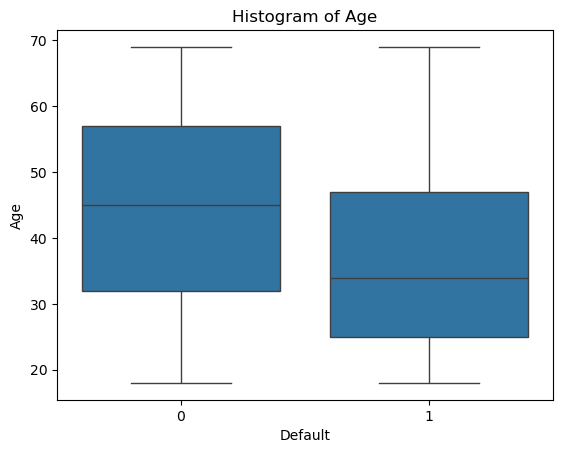

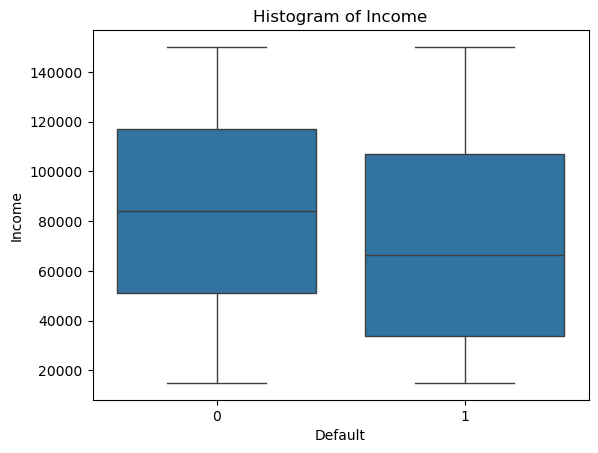

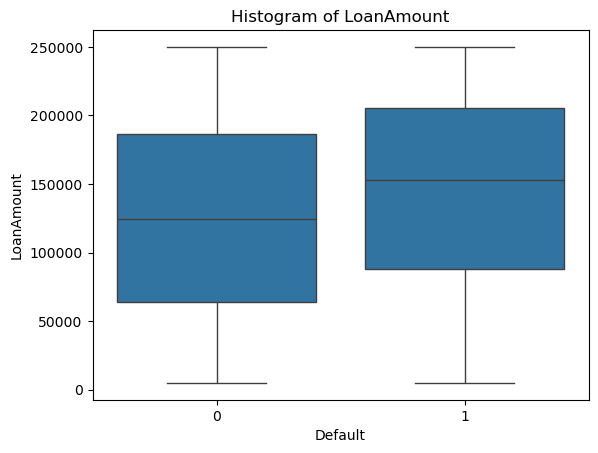

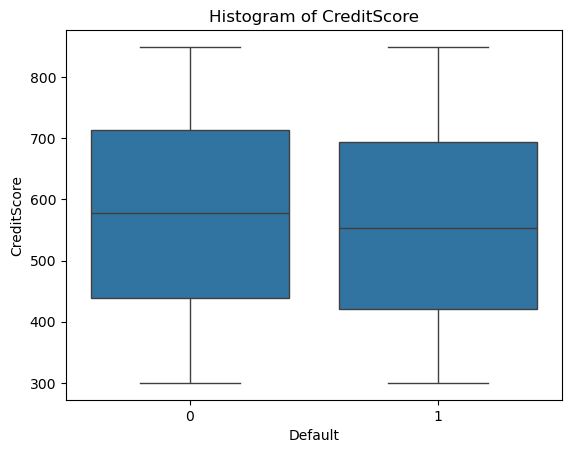

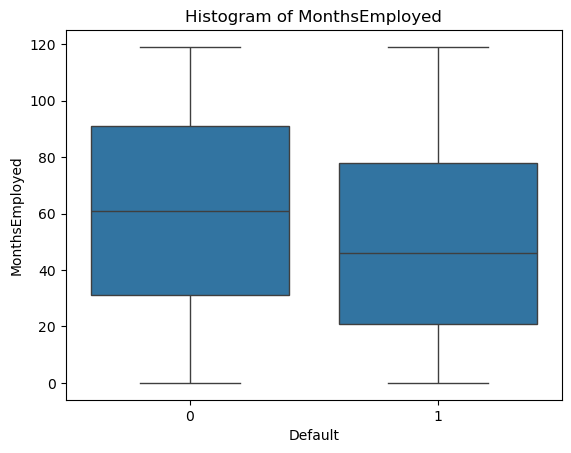

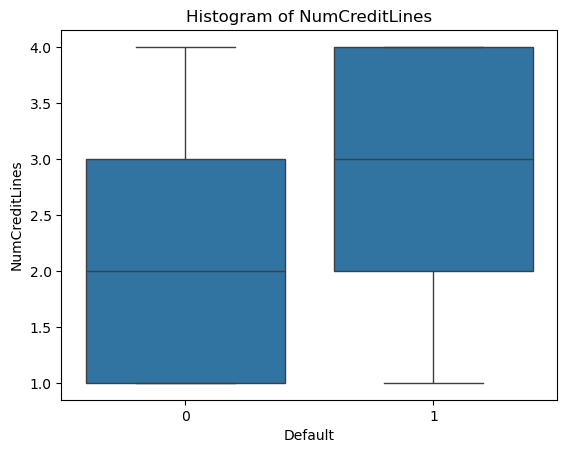

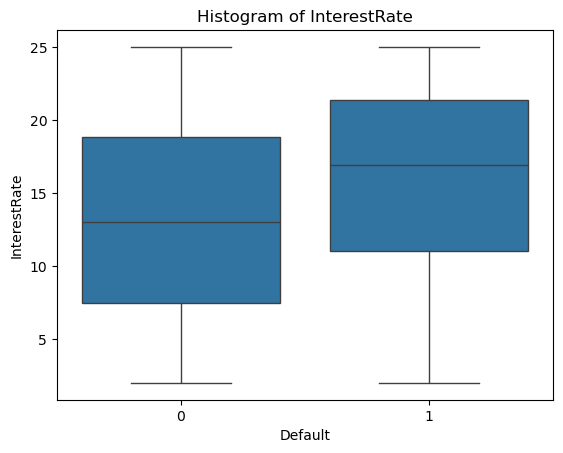

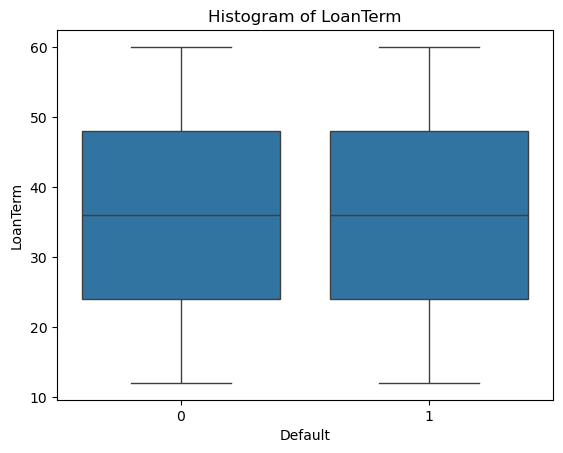

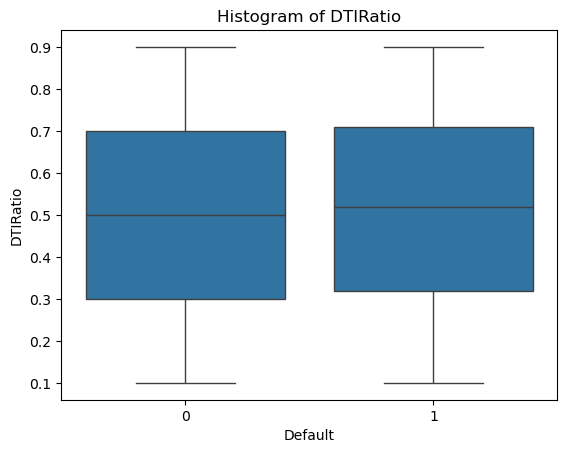

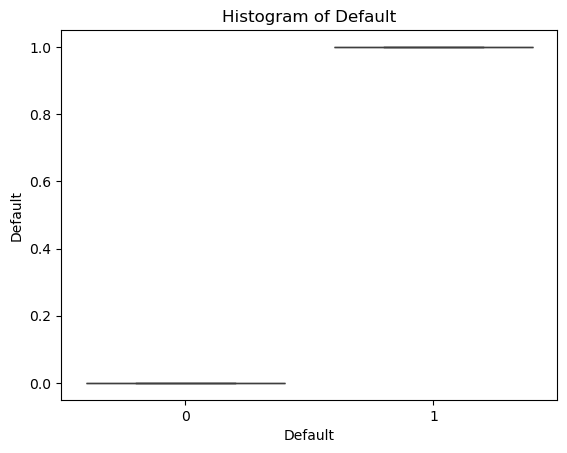

In [10]:
for column in train_numerical.columns:
    sns.boxplot(x =train_numerical['Default'], y = train_numerical[column])
    plt.title(f'Histogram of {column}')
    plt.show()

In [11]:
train_numerical.columns


Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')

C:\Users\soonn\AppData\Local\Temp\ipykernel_31332\2181029356.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  DTIRatio_grp = train_numerical[['DTIRatio_grp','Default']].groupby(['DTIRatio_grp']).mean().reset_index()


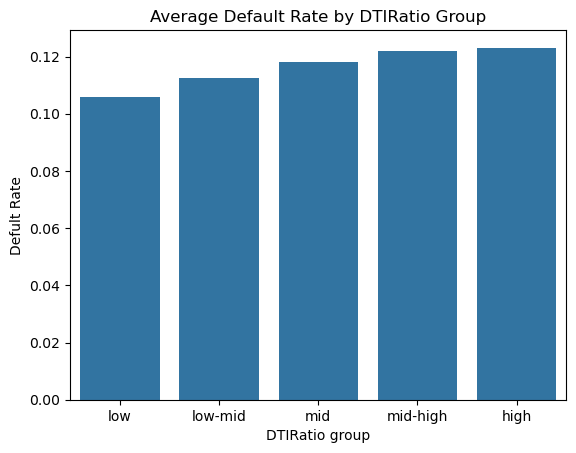

In [12]:
train_numerical['DTIRatio'].describe()

label = ['low','low-mid','mid','mid-high','high']
emp_label = ['Short','mid','long']
no_label = [1,2,3,4]
term__label = [12,24,36,48,60]

train_numerical['DTIRatio_grp'] = pd.cut(train_numerical['DTIRatio'], bins = 5, labels = label)
DTIRatio_grp = train_numerical[['DTIRatio_grp','Default']].groupby(['DTIRatio_grp']).mean().reset_index()



sns.barplot(x = 'DTIRatio_grp', y = 'Default', data = DTIRatio_grp)
plt.title('Average Default Rate by DTIRatio Group')
plt.xlabel('DTIRatio group')
plt.ylabel('Defult Rate')
DTIRatio_grp

# DTI ratio increase, default rate increase

test_numerical['DTIRatio_grp'] = pd.cut(test_numerical['DTIRatio'], bins = 5, labels = label)



In [13]:
chi2_build(train_numerical,'DTIRatio_grp')

Chi-square: 103.2388, p-value: 0.0000
✅ Significant difference in default rates across bins


C:\Users\soonn\AppData\Local\Temp\ipykernel_31332\2739745453.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  LoanTerm_grp = train_numerical[['LoanTerm_grp','Default']].groupby(['LoanTerm_grp']).mean().reset_index()


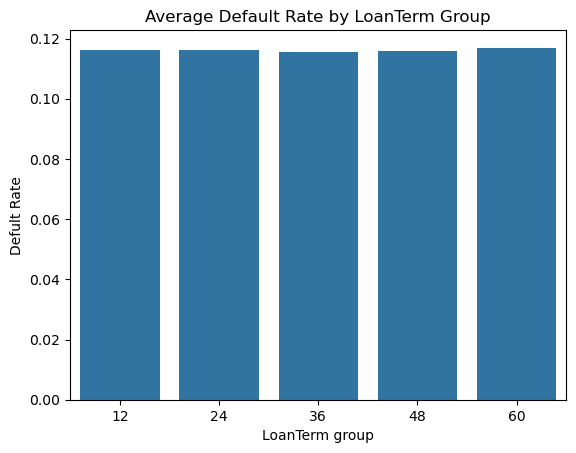

In [14]:

train_numerical['LoanTerm'].value_counts()

label = ['low','low-mid','mid','mid-high','high']
emp_label = ['Short','mid','long']
no_label = [1,2,3,4]
term__label = [12,24,36,48,60]
train_numerical['LoanTerm_grp'] = pd.cut(train_numerical['LoanTerm'], bins = 5, labels = term__label)
LoanTerm_grp = train_numerical[['LoanTerm_grp','Default']].groupby(['LoanTerm_grp']).mean().reset_index()

sns.barplot(x = 'LoanTerm_grp', y = 'Default', data = LoanTerm_grp)
plt.title('Average Default Rate by LoanTerm Group')
plt.xlabel('LoanTerm group')
plt.ylabel('Defult Rate')


# default rate distributes equally over groups

test_numerical['LoanTerm_grp'] = pd.cut(test_numerical['LoanTerm'], bins = 5, labels = term__label)


In [15]:
train_numerical = train_numerical.drop(['LoanTerm_grp','LoanTerm'],axis = 1)
test_numerical = test_numerical.drop(['LoanTerm_grp','LoanTerm'],axis = 1)


In [78]:
train_numerical['InterestRate'].describe()

label = ['low','low-mid','mid','mid-high','high']
emp_label = ['Short','mid','long']
no_label = [1,2,3,4]

train_numerical['InterestRate_grp'] = pd.cut(train_numerical['InterestRate'], bins = 5, labels = label)
InterestRate_grp = train_numerical[['InterestRate_grp','Default']].groupby(['InterestRate_grp']).mean().reset_index()

sns.barplot(x = 'InterestRate_grp', y = 'Default', data = InterestRate_grp)
plt.title('Average Default Rate by InterestRate Group')
plt.xlabel('InterestRate group')
plt.ylabel('Defult Rate')
InterestRate_grp
# As interest rate goes up, default rate increase.

test_numerical['InterestRate_grp'] = pd.cut(test_numerical['InterestRate'], bins = 5, labels = label)


KeyError: 'InterestRate'

In [17]:
chi2_build(train_numerical, 'InterestRate')

Chi-square: 6736.6066, p-value: 0.0000
✅ Significant difference in default rates across bins


C:\Users\soonn\AppData\Local\Temp\ipykernel_31332\2966713080.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  NumCreditLines_grp = train_numerical[['NumCreditLines_grp','Default']].groupby(['NumCreditLines_grp']).mean().reset_index()


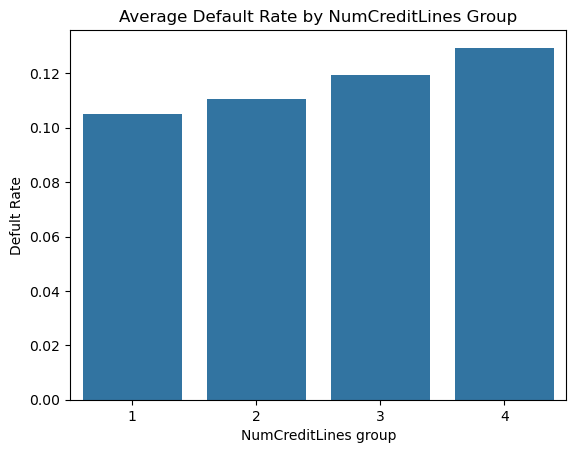

In [18]:

label = ['low','low-mid','mid','mid-high','high']
emp_label = ['Short','mid','long']
no_label = [1,2,3,4]

train_numerical['NumCreditLines_grp'] = pd.cut(train_numerical['NumCreditLines'], bins = 4, labels = no_label)
NumCreditLines_grp = train_numerical[['NumCreditLines_grp','Default']].groupby(['NumCreditLines_grp']).mean().reset_index()

sns.barplot(x = 'NumCreditLines_grp', y = 'Default', data = NumCreditLines_grp)
plt.title('Average Default Rate by NumCreditLines Group')
plt.xlabel('NumCreditLines group')
plt.ylabel('Defult Rate')
NumCreditLines_grp

# As credit employment rate is short, higher rate of default
# as more line of credit, more default rate


test_numerical['NumCreditLines_grp'] = pd.cut(test_numerical['NumCreditLines'], bins = 4, labels = no_label)


In [19]:
chi2_build(train_numerical,'NumCreditLines_grp' )

Chi-square: 208.6514, p-value: 0.0000
✅ Significant difference in default rates across bins


C:\Users\soonn\AppData\Local\Temp\ipykernel_31332\639603422.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  MonthsEmployed_grp = train_numerical[['MonthsEmployed_grp','Default']].groupby(['MonthsEmployed_grp']).mean().reset_index()


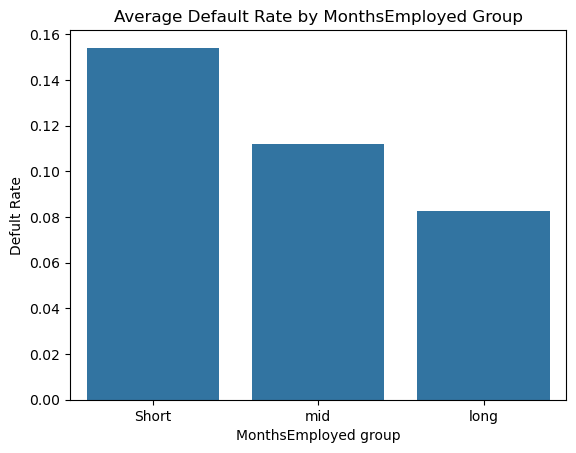

In [20]:
train_numerical['MonthsEmployed'].describe()
label = ['low','low-mid','mid','mid-high','high']
emp_label = ['Short','mid','long']
train_numerical['MonthsEmployed_grp'] = pd.cut(train_numerical['MonthsEmployed'], bins = 3, labels = emp_label)
MonthsEmployed_grp = train_numerical[['MonthsEmployed_grp','Default']].groupby(['MonthsEmployed_grp']).mean().reset_index()

sns.barplot(x = 'MonthsEmployed_grp', y = 'Default', data = MonthsEmployed_grp)
plt.title('Average Default Rate by MonthsEmployed Group')
plt.xlabel('MonthsEmployed group')
plt.ylabel('Defult Rate')
MonthsEmployed_grp

# As credit employment rate is short, higher rate of default
test_numerical['MonthsEmployed_grp'] = pd.cut(test_numerical['MonthsEmployed'], bins = 3, labels = emp_label)


In [21]:
chi2_build(train_numerical,'MonthsEmployed_grp' )

Chi-square: 2148.3732, p-value: 0.0000
✅ Significant difference in default rates across bins


C:\Users\soonn\AppData\Local\Temp\ipykernel_31332\2987438034.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  CreditScore_grp = train_numerical[['CreditScore_grp','Default']].groupby(['CreditScore_grp']).mean().reset_index()


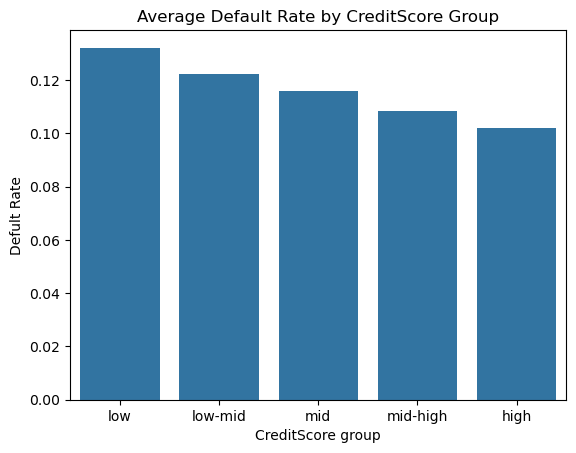

In [22]:
train_numerical['CreditScore'].describe()
label = ['low','low-mid','mid','mid-high','high']
train_numerical['CreditScore_grp'] = pd.cut(train_numerical['CreditScore'], bins = 5, labels = label)
CreditScore_grp = train_numerical[['CreditScore_grp','Default']].groupby(['CreditScore_grp']).mean().reset_index()

sns.barplot(x = 'CreditScore_grp', y = 'Default', data = CreditScore_grp)
plt.title('Average Default Rate by CreditScore Group')
plt.xlabel('CreditScore group')
plt.ylabel('Defult Rate')
CreditScore_grp

# As credit score goes up, the default rate descrease
test_numerical['CreditScore_grp'] = pd.cut(test_numerical['CreditScore'], bins = 5, labels = label)


In [23]:
chi2_build(train_numerical,'CreditScore_grp' )

Chi-square: 277.6744, p-value: 0.0000
✅ Significant difference in default rates across bins


C:\Users\soonn\AppData\Local\Temp\ipykernel_31332\2501128831.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  LoanAmount_grp = train_numerical[['LoanAmount_grp','Default']].groupby(['LoanAmount_grp']).mean().reset_index()


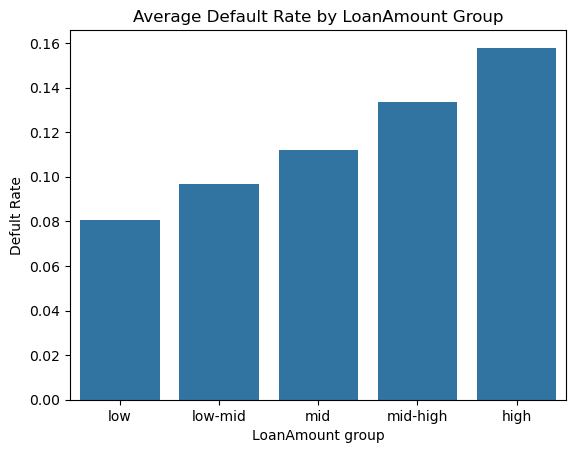

In [24]:
train_numerical['LoanAmount'].describe()
label = ['low','low-mid','mid','mid-high','high']
train_numerical['LoanAmount_grp'] = pd.cut(train_numerical['LoanAmount'], bins = 5, labels = label)
LoanAmount_grp = train_numerical[['LoanAmount_grp','Default']].groupby(['LoanAmount_grp']).mean().reset_index()

sns.barplot(x = 'LoanAmount_grp', y = 'Default', data = LoanAmount_grp)
plt.title('Average Default Rate by LoanAmount Group')
plt.xlabel('LoanAmount group')
plt.ylabel('Defult Rate')
LoanAmount_grp 

# As loan amount inscrease, the default rate increase.
test_numerical['LoanAmount_grp'] = pd.cut(test_numerical['LoanAmount'], bins = 5, labels = label)


In [25]:
chi2_build(train_numerical,'LoanAmount_grp' )

Chi-square: 1851.2428, p-value: 0.0000
✅ Significant difference in default rates across bins


C:\Users\soonn\AppData\Local\Temp\ipykernel_31332\1331256699.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_grp = train_numerical[['income_grp','Default']].groupby(['income_grp']).mean().reset_index()


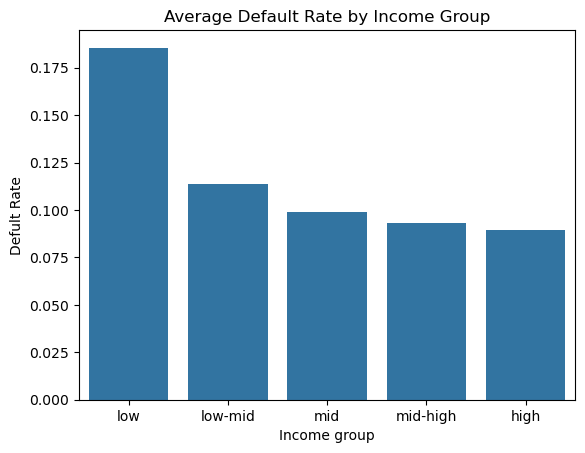

In [26]:
train_numerical['Income'].describe()
label = ['low','low-mid','mid','mid-high','high']
train_numerical['income_grp'] = pd.cut(train_numerical['Income'], bins = 5, labels = label)
income_grp = train_numerical[['income_grp','Default']].groupby(['income_grp']).mean().reset_index()

sns.barplot(x = 'income_grp', y = 'Default', data = income_grp)
plt.title('Average Default Rate by Income Group')
plt.xlabel('Income group')
plt.ylabel('Defult Rate')
income_grp 

# low income group has the highest default rate. but may be it is by chance. 
test_numerical['income_grp'] = pd.cut(test_numerical['Income'], bins = 5, labels = label)


C:\Users\soonn\AppData\Local\Temp\ipykernel_31332\2580347404.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grp = train_numerical[['Age_grp','Default']].groupby(['Age_grp']).mean().reset_index()


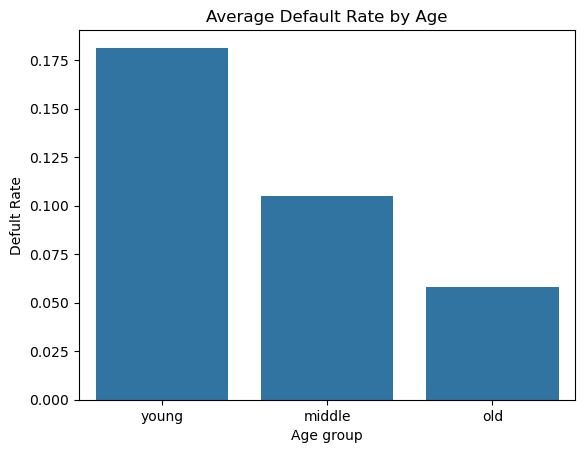

In [28]:
train_numerical['Age'].describe()
label = ['young','middle','old']
train_numerical['Age_grp'] = pd.cut(train_numerical['Age'], bins = 3, labels = label)
age_grp = train_numerical[['Age_grp','Default']].groupby(['Age_grp']).mean().reset_index()

sns.barplot(x = 'Age_grp', y = 'Default', data = age_grp)
plt.title('Average Default Rate by Age')
plt.xlabel('Age group')
plt.ylabel('Defult Rate')

# As we see, young adult group has higher rate of defualt than middle and old group.

test_numerical['Age_grp'] = pd.cut(test_numerical['Age'], bins = 3, labels = label)


Chi-square: 5353.0734, p-value: 0.0000
✅ Significant difference in default rates across bins


C:\Users\soonn\AppData\Local\Temp\ipykernel_31332\3813499662.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_grp = train_numerical[['interests_grp','Default']].groupby(['interests_grp']).mean().reset_index()


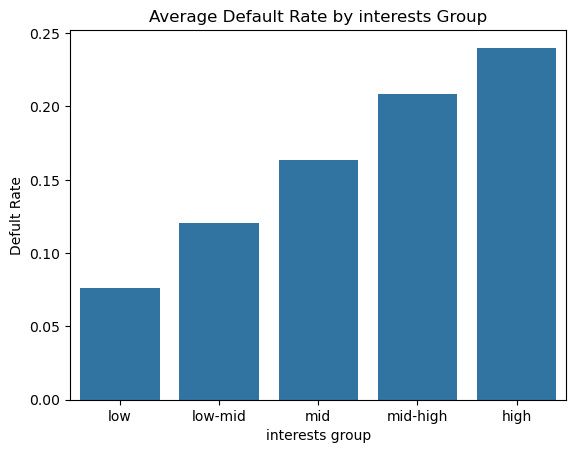

In [29]:
train_numerical['interests'] = train_numerical['LoanAmount'] * train_numerical['InterestRate'] / 100

train_numerical['interests'].describe()

test_numerical['interests'] = test_numerical['LoanAmount'] * test_numerical['InterestRate'] / 100

label = ['low','low-mid','mid','mid-high','high']
train_numerical['interests_grp'] = pd.cut(train_numerical['interests'], bins = 5, labels = label)
income_grp = train_numerical[['interests_grp','Default']].groupby(['interests_grp']).mean().reset_index()

sns.barplot(x = 'interests_grp', y = 'Default', data = income_grp)
plt.title('Average Default Rate by interests Group')
plt.xlabel('interests group')
plt.ylabel('Defult Rate')
income_grp 

chi2_build(train_numerical, 'interests_grp')

train_numerical =train_numerical.drop(['LoanAmount', 'InterestRate'], axis = 1)
test_numerical = test_numerical.drop(['LoanAmount', 'InterestRate'], axis = 1)




In [30]:
train_numerical.drop(['LoanAmount_grp', 'InterestRate_grp'], axis = 1)
test_numerical.drop(['LoanAmount_grp', 'InterestRate_grp'], axis = 1)
train_numerical.head()

,Age,Income,CreditScore,MonthsEmployed,NumCreditLines,DTIRatio,Default,DTIRatio_grp,InterestRate_grp,NumCreditLines_grp,MonthsEmployed_grp,CreditScore_grp,LoanAmount_grp,income_grp,Age_grp,interests,interests_grp
0,56,85994,520,80,4,0.44,0,mid,mid,4,long,mid,low,mid,old,7704.4001,low
1,69,50432,458,15,1,0.68,0,mid-high,low,1,Short,low-mid,mid,low-mid,old,5985.5640,low
2,46,84208,451,26,3,0.31,1,low-mid,high,3,Short,low-mid,mid,mid,middle,27349.0996,mid
3,32,31713,743,0,3,0.23,0,low,low-mid,3,Short,high,low,low,young,3167.2893,low
4,60,20437,633,8,4,0.73,0,mid-high,low,4,Short,mid-high,low,low,old,594.9489,low


In [31]:
train_categorical.head()

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,Master's,Full-time,Married,No,No,Other,Yes,0
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,High School,Full-time,Married,No,No,Business,No,0
4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


Text(0, 0.5, 'Defult Rate')

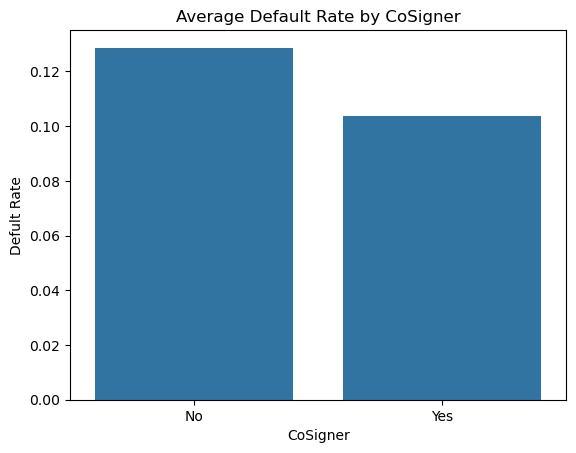

In [32]:
train_categorical['HasCoSigner'].unique()

HasCoSigner_grp = train_categorical[['HasCoSigner','Default']].groupby(['HasCoSigner']).mean().reset_index()

sns.barplot(x = 'HasCoSigner', y = 'Default', data = HasCoSigner_grp)
plt.title('Average Default Rate by CoSigner')
plt.xlabel('CoSigner')
plt.ylabel('Defult Rate')
# with cosigner, default rate is lower.

In [33]:
chi2_build(train_categorical,'HasCoSigner')

Chi-square: 390.3050, p-value: 0.0000
✅ Significant difference in default rates across bins


Text(0, 0.5, 'Defult Rate')

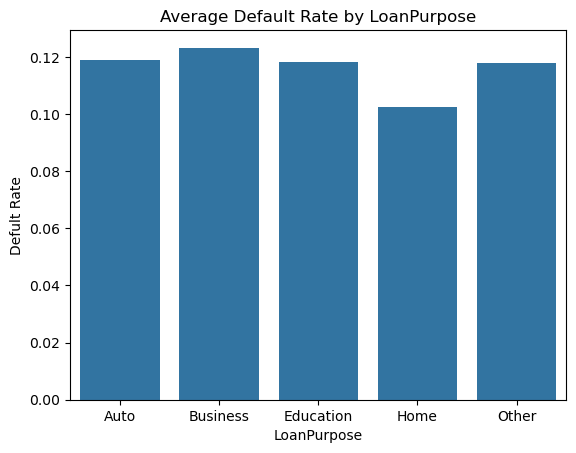

In [34]:
train_categorical['LoanPurpose'].unique()

LoanPurpose_grp = train_categorical[['LoanPurpose','Default']].groupby(['LoanPurpose']).mean().reset_index()

sns.barplot(x = 'LoanPurpose', y = 'Default', data = LoanPurpose_grp)
plt.title('Average Default Rate by LoanPurpose')
plt.xlabel('LoanPurpose')
plt.ylabel('Defult Rate')
# loan for home has the lowest default rate.

In [35]:
chi2_build(train_categorical,'LoanPurpose')

Chi-square: 127.9342, p-value: 0.0000
✅ Significant difference in default rates across bins


Text(0, 0.5, 'Defult Rate')

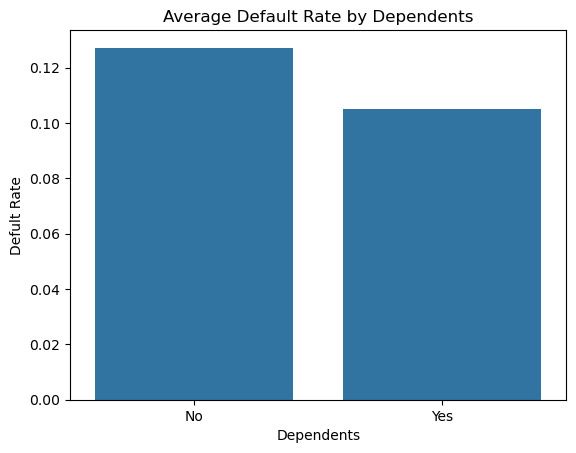

In [36]:

train_categorical['HasDependents'].unique()

dependents_grp = train_categorical[['HasDependents','Default']].groupby(['HasDependents']).mean().reset_index()

sns.barplot(x = 'HasDependents', y = 'Default', data = dependents_grp)
plt.title('Average Default Rate by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Defult Rate')
# less default rate on has dependent

In [37]:
chi2_build(train_categorical,'HasDependents')

Chi-square: 306.8506, p-value: 0.0000
✅ Significant difference in default rates across bins


Text(0, 0.5, 'Defult Rate')

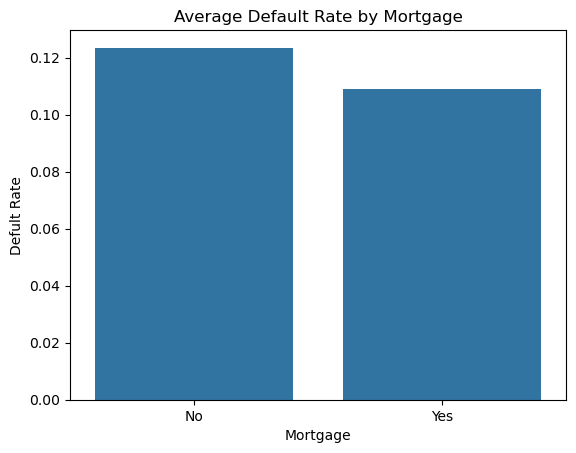

In [38]:

train_categorical['HasMortgage'].unique()

mortgage_grp = train_categorical[['HasMortgage','Default']].groupby(['HasMortgage']).mean().reset_index()

sns.barplot(x = 'HasMortgage', y = 'Default', data = mortgage_grp)
plt.title('Average Default Rate by Mortgage')
plt.xlabel('Mortgage')
plt.ylabel('Defult Rate')
# less default rate on has mortgage

In [39]:
chi2_build(train_categorical,'HasMortgage')

Chi-square: 133.2520, p-value: 0.0000
✅ Significant difference in default rates across bins


Text(0, 0.5, 'Defult Rate')

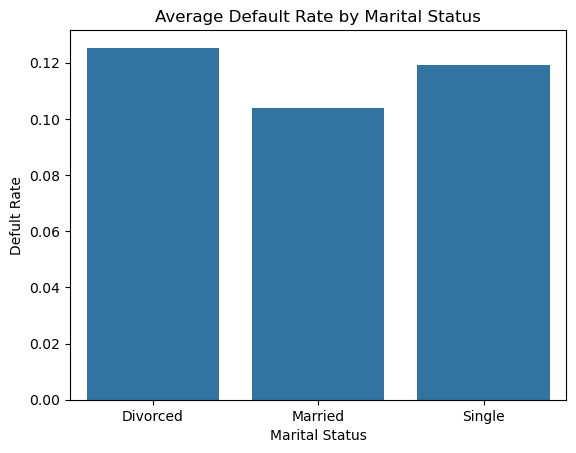

In [40]:

train_categorical['MaritalStatus'].unique()

mr_stat_grp = train_categorical[['MaritalStatus','Default']].groupby(['MaritalStatus']).mean().reset_index()

sns.barplot(x = 'MaritalStatus', y = 'Default', data = mr_stat_grp)
plt.title('Average Default Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Defult Rate')

# married relatively low default rate comparing to divorced and single


In [41]:
chi2_build(train_categorical,'MaritalStatus')

Chi-square: 200.3611, p-value: 0.0000
✅ Significant difference in default rates across bins


Text(0, 0.5, 'Defult Rate')

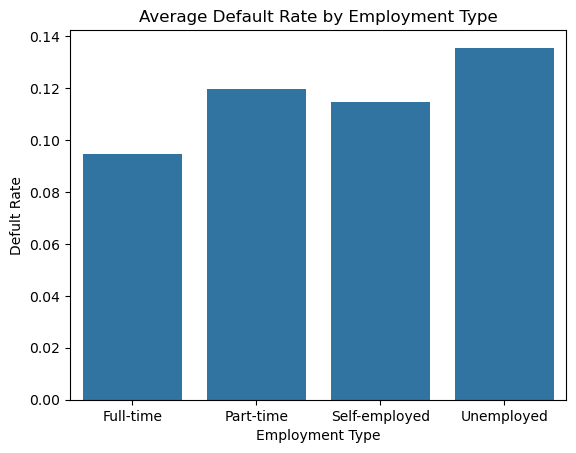

In [42]:
train_categorical.head()
train_categorical['EmploymentType'].unique()

emp_type_grp = train_categorical[['EmploymentType','Default']].groupby(['EmploymentType']).mean().reset_index()

sns.barplot(x = 'EmploymentType', y = 'Default', data = emp_type_grp)
plt.title('Average Default Rate by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Defult Rate')

# fulltime less default and unemployed more default

In [43]:
chi2_build(train_categorical,'EmploymentType')

Chi-square: 529.7449, p-value: 0.0000
✅ Significant difference in default rates across bins


Text(0, 0.5, 'Defult Rate')

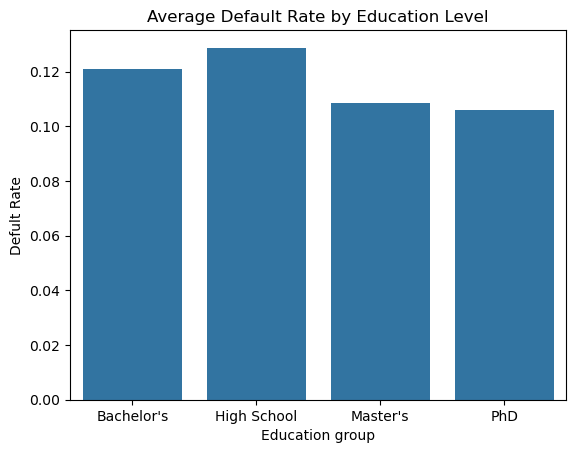

In [44]:

train_categorical.head()
train_categorical['Education'].unique()
edu_grp = train_categorical[['Education','Default']].groupby(['Education']).mean().reset_index()

sns.barplot(x = 'Education', y = 'Default', data = edu_grp)
plt.title('Average Default Rate by Education Level')
plt.xlabel('Education group')
plt.ylabel('Defult Rate')


In [45]:
chi2_build(train_categorical,'Education')

Chi-square: 214.0190, p-value: 0.0000
✅ Significant difference in default rates across bins


In [46]:

train_numerical = train_numerical.drop(['NumCreditLines_grp', ], axis = 1)
test_numerical = test_numerical.drop(['NumCreditLines_grp', ], axis = 1)


In [47]:
# train_numerical = train_numerical[['DTIRatio_grp', 'InterestRate_grp','MonthsEmployed_grp','CreditScore_grp', 'LoanAmount_grp','income_grp', 'Age_grp','Default' ]]
# test_numerical = test_numerical[['DTIRatio_grp', 'InterestRate_grp','MonthsEmployed_grp','CreditScore_grp', 'LoanAmount_grp','income_grp', 'Age_grp' ]]


In [48]:
train_numerical.head()

,Age,Income,CreditScore,MonthsEmployed,NumCreditLines,DTIRatio,Default,DTIRatio_grp,InterestRate_grp,MonthsEmployed_grp,CreditScore_grp,LoanAmount_grp,income_grp,Age_grp,interests,interests_grp
0,56,85994,520,80,4,0.44,0,mid,mid,long,mid,low,mid,old,7704.4001,low
1,69,50432,458,15,1,0.68,0,mid-high,low,Short,low-mid,mid,low-mid,old,5985.5640,low
2,46,84208,451,26,3,0.31,1,low-mid,high,Short,low-mid,mid,mid,middle,27349.0996,mid
3,32,31713,743,0,3,0.23,0,low,low-mid,Short,high,low,low,young,3167.2893,low
4,60,20437,633,8,4,0.73,0,mid-high,low,Short,mid-high,low,low,old,594.9489,low


In [49]:
train_numerical['DTIRatio_grp_le'] = label_encode_columns(train_numerical, 'DTIRatio_grp')
train_numerical = train_numerical.drop(['DTIRatio_grp'],axis = 1)

test_numerical['DTIRatio_grp_le'] = label_encode_columns(test_numerical, 'DTIRatio_grp')
test_numerical = test_numerical.drop(['DTIRatio_grp'],axis = 1)

In [50]:
train_numerical['Age_grp_le'] = label_encode_columns(train_numerical, 'Age_grp')
train_numerical = train_numerical.drop(['Age_grp'],axis = 1)

test_numerical['Age_grp_le'] = label_encode_columns(test_numerical, 'Age_grp')
test_numerical = test_numerical.drop(['Age_grp'],axis = 1)

In [51]:
train_numerical['income_grp_le'] = label_encode_columns(train_numerical, 'income_grp')
train_numerical = train_numerical.drop(['income_grp'],axis = 1)

test_numerical['income_grp_le'] = label_encode_columns(test_numerical, 'income_grp')
test_numerical = test_numerical.drop(['income_grp'],axis = 1)

In [52]:
train_numerical['LoanAmount_grp_le'] = label_encode_columns(train_numerical, 'LoanAmount_grp')
train_numerical = train_numerical.drop(['LoanAmount_grp'],axis = 1)

test_numerical['LoanAmount_grp_le'] = label_encode_columns(test_numerical, 'LoanAmount_grp')
test_numerical = test_numerical.drop(['LoanAmount_grp'],axis = 1)

In [53]:
train_numerical['CreditScore_grp_le'] = label_encode_columns(train_numerical, 'CreditScore_grp')
train_numerical = train_numerical.drop(['CreditScore_grp'],axis = 1)

test_numerical['CreditScore_grp_le'] = label_encode_columns(test_numerical, 'CreditScore_grp')
test_numerical = test_numerical.drop(['CreditScore_grp'],axis = 1)

In [54]:
train_numerical['MonthsEmployed_grp_le'] = label_encode_columns(train_numerical, 'MonthsEmployed_grp')
train_numerical = train_numerical.drop(['MonthsEmployed_grp'],axis = 1)

test_numerical['MonthsEmployed_grp_le'] = label_encode_columns(test_numerical, 'MonthsEmployed_grp')
test_numerical = test_numerical.drop(['MonthsEmployed_grp'],axis = 1)


In [55]:
train_numerical['InterestRate_grp_le'] = label_encode_columns(train_numerical, 'InterestRate_grp')
train_numerical = train_numerical.drop(['InterestRate_grp'],axis = 1)

test_numerical['InterestRate_grp_le'] = label_encode_columns(test_numerical, 'InterestRate_grp')
test_numerical = test_numerical.drop(['InterestRate_grp'],axis = 1)

In [56]:
train_numerical.head()

,Age,Income,CreditScore,MonthsEmployed,NumCreditLines,DTIRatio,Default,interests,interests_grp,DTIRatio_grp_le,Age_grp_le,income_grp_le,LoanAmount_grp_le,CreditScore_grp_le,MonthsEmployed_grp_le,InterestRate_grp_le
0,56,85994,520,80,4,0.44,0,7704.4001,low,3,1,3,1,3,1,3
1,69,50432,458,15,1,0.68,0,5985.5640,low,4,1,2,3,2,0,1
2,46,84208,451,26,3,0.31,1,27349.0996,mid,2,0,3,3,2,0,0
3,32,31713,743,0,3,0.23,0,3167.2893,low,1,2,1,1,0,0,2
4,60,20437,633,8,4,0.73,0,594.9489,low,4,1,1,1,4,0,1


In [57]:
dummydf = pd.concat([train_numerical.iloc[:,:6],train_numerical['interests']],axis = 1)


from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

for column in dummydf.columns.tolist():
        # Reshape to 2D, then flatten back after scaling
        dummydf[column] = ss.fit_transform(dummydf[column].values.reshape(-1, 1)).flatten()

train_numerical = train_numerical.drop(train_numerical.iloc[:,:6].columns.tolist(), axis = 1)
train_numerical

train_numerical = train_numerical.drop(['interests'], axis = 1)

train_numerical = pd.concat([train_numerical,dummydf], axis = 1)
'''
train_numerical.head()


'''


'\ntrain_numerical.head()\n\n\n'

In [58]:
train_numerical

train_numerical['interests_le'] = label_encode_columns(train_numerical, 'interests_grp')
train_numerical = train_numerical.drop(['interests_grp'],axis = 1)


In [59]:
dummydf = pd.concat([test_numerical.iloc[:,:6],test_numerical['interests']],axis = 1)
ss = StandardScaler()

for column in dummydf.columns.tolist():
        # Reshape to 2D, then flatten back after scaling
        dummydf[column] = ss.fit_transform(dummydf[column].values.reshape(-1, 1)).flatten()

dummydf

test_numerical = test_numerical.drop(test_numerical.iloc[:,:6].columns.tolist(), axis = 1)
test_numerical = test_numerical.drop(['interests'], axis = 1)
test_numerical = pd.concat([test_numerical,dummydf], axis = 1)
test_numerical.head()



,DTIRatio_grp_le,Age_grp_le,income_grp_le,LoanAmount_grp_le,CreditScore_grp_le,MonthsEmployed_grp_le,InterestRate_grp_le,Age,Income,CreditScore,MonthsEmployed,NumCreditLines,DTIRatio,interests
0,1,2,0,1,0,0,1,-0.768287,1.261556,1.431578,-1.058712,-0.448097,-1.601175,-1.068402
1,4,1,0,1,1,1,3,1.163005,1.330001,-1.295129,0.793787,-0.448097,0.388061,-1.089080
2,0,1,4,3,3,0,1,0.763427,0.855149,-0.073463,-1.637618,0.446242,1.382679,-0.649897
3,0,1,3,2,1,0,0,0.963216,0.320347,-1.496641,-1.029767,-1.342437,1.166457,-0.283130
4,3,1,3,4,2,2,0,1.296197,-0.276149,-0.778755,-0.219299,0.446242,-0.260603,1.812668


In [60]:
train_numerical.head()

,Default,DTIRatio_grp_le,Age_grp_le,income_grp_le,LoanAmount_grp_le,CreditScore_grp_le,MonthsEmployed_grp_le,InterestRate_grp_le,Age,Income,CreditScore,MonthsEmployed,NumCreditLines,DTIRatio,interests,interests_le
0,0,3,1,3,1,3,1,3,0.833990,0.089693,-0.341492,0.590533,1.341937,-0.260753,-0.699373,1
1,0,4,1,2,3,2,0,1,1.701221,-0.823021,-0.731666,-1.285731,-1.343791,0.778585,-0.825927,1
2,1,2,0,3,3,2,0,0,0.166888,0.043854,-0.775718,-0.968209,0.446694,-0.823728,0.747024,3
3,0,1,2,1,1,0,0,2,-0.767053,-1.303452,1.061875,-1.718715,0.446694,-1.170174,-1.033431,1
4,0,4,1,1,1,4,0,1,1.100830,-1.592855,0.369631,-1.487790,1.341937,0.995114,-1.222827,1


In [61]:
train_categorical.head()

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,Master's,Full-time,Married,No,No,Other,Yes,0
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,High School,Full-time,Married,No,No,Business,No,0
4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [62]:
train_categorical_label = train_categorical.drop(['HasMortgage','HasDependents','HasCoSigner','Default'],axis = 1)
train_categorical_onehot = train_categorical[['HasMortgage','HasDependents','HasCoSigner']]
train_categorical_onehot

test_categorical_label = test_categorical.drop(['HasMortgage','HasDependents','HasCoSigner'],axis = 1)
test_categorical_onehot = test_categorical[['HasMortgage','HasDependents','HasCoSigner']]


def update_cate_label(df):
    
    for column in df.columns :
        df[f'{column}_le'] = label_encode_columns(df, column)
        df = df.drop([column],axis = 1)
    return df
train_categorical_label =update_cate_label(train_categorical_label)

train_categorical_onehot =pd.get_dummies(train_categorical_onehot)

train_categorical_final = pd.concat([train_categorical_label,train_categorical_onehot], axis = 1)
train_categorical_final.head()

test_categorical_label =update_cate_label(test_categorical_label)

test_categorical_onehot =pd.get_dummies(test_categorical_onehot)

test_categorical_final = pd.concat([test_categorical_label,test_categorical_onehot], axis = 1)


In [63]:
train_df_final = pd.concat([train_numerical, train_categorical_final], axis = 1)
train_df_final = train_df_final.drop(['InterestRate_grp_le'], axis = 1)
print(train_df_final.info())

test_df_final = pd.concat([test_numerical, test_categorical_final], axis = 1)
test_df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Default                255347 non-null  int64  
 1   DTIRatio_grp_le        255347 non-null  int64  
 2   Age_grp_le             255347 non-null  int64  
 3   income_grp_le          255347 non-null  int64  
 4   LoanAmount_grp_le      255347 non-null  int64  
 5   CreditScore_grp_le     255347 non-null  int64  
 6   MonthsEmployed_grp_le  255347 non-null  int64  
 7   Age                    255347 non-null  float64
 8   Income                 255347 non-null  float64
 9   CreditScore            255347 non-null  float64
 10  MonthsEmployed         255347 non-null  float64
 11  NumCreditLines         255347 non-null  float64
 12  DTIRatio               255347 non-null  float64
 13  interests              255347 non-null  float64
 14  interests_le           255347 non-nu

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

In [64]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn. metrics import classification_report, roc_auc_score, roc_curve

X = train_df_final.drop(['Default'], axis = 1)
y = train_df_final['Default']

x_train, x_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = 0.3, random_state =42)


In [65]:
scale = (y == 0).sum() / (y == 1).sum()

xgb_model = XGBClassifier(use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale,  # key line
    random_state=42)
xgb_model.fit(x_train,y_train)

\\?\C:\Users\soonn\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\xgboost\training.py:183: UserWarning: [06:37:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [66]:
y_pred_proba = xgb_model.predict_proba(x_test)[:,1]
y_pred = xgb_model.predict(x_test)
y_pred_proba

array([0.21412322, 0.19507171, 0.27701625, ..., 0.16893919, 0.679542  ,
       0.1981302 ], dtype=float32)

In [67]:
print('Classification Report')
print(classification_report(y_test,y_pred))


Classification Report
              precision    recall  f1-score   support

           0       0.94      0.73      0.82     67709
           1       0.23      0.62      0.33      8896

    accuracy                           0.72     76605
   macro avg       0.58      0.67      0.58     76605
weighted avg       0.85      0.72      0.76     76605



In [68]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc: .4f}')

ROC AUC Score:  0.6722


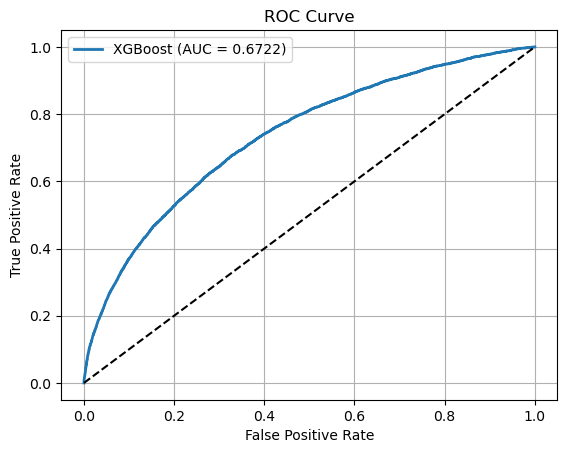

In [69]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [70]:
predicted_probailites = xgb_model.predict_proba(test_df_final)[:,1]
print(y.value_counts(normalize=True))

ValueError: feature_names mismatch: ['DTIRatio_grp_le', 'Age_grp_le', 'income_grp_le', 'LoanAmount_grp_le', 'CreditScore_grp_le', 'MonthsEmployed_grp_le', 'Age', 'Income', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'DTIRatio', 'interests', 'interests_le', 'Education_le', 'EmploymentType_le', 'MaritalStatus_le', 'LoanPurpose_le', 'HasMortgage_No', 'HasMortgage_Yes', 'HasDependents_No', 'HasDependents_Yes', 'HasCoSigner_No', 'HasCoSigner_Yes'] ['DTIRatio_grp_le', 'Age_grp_le', 'income_grp_le', 'LoanAmount_grp_le', 'CreditScore_grp_le', 'MonthsEmployed_grp_le', 'InterestRate_grp_le', 'Age', 'Income', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'DTIRatio', 'interests', 'Education_le', 'EmploymentType_le', 'MaritalStatus_le', 'LoanPurpose_le', 'HasMortgage_No', 'HasMortgage_Yes', 'HasDependents_No', 'HasDependents_Yes', 'HasCoSigner_No', 'HasCoSigner_Yes']
expected interests_le in input data
training data did not have the following fields: InterestRate_grp_le

In [77]:
!pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values (0-255) to (0-1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten 28x28 images into 784-element vectors
x_train = x_train.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))

# One-hot encode the labels (0-9)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build a simple neural network
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [71]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Fit a dummy classifier on the feature columns in train_df:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(train_df.drop(['LoanID', 'Default'], axis=1), train_df.Default)

DummyClassifier(strategy='stratified')

In [72]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = dummy_clf.predict_proba(test_df.drop(['LoanID'], axis=1))[:, 1]

In [73]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': predicted_probailites})

NameError: name 'predicted_probailites' is not defined

In [74]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

NameError: name 'prediction_df' is not defined

**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!